In [43]:
in_1 = "Staff empathy and compassion"

in_2 = "Patient respect"

in_3 = "Environment and ambiance"


in_4 = "Test results"

in_5 = "Communication effectiveness"


in_6 = "Prescriptions and medication management"

in_7 = "Appointment availability" 

in_8 = "Wait Times"
in_9 = "Treatment quality"
in_10 = "Reception staff interaction"
in_11 = "Staff professionalism"
in_12 = "Follow-up and continuity of care"
in_13 = "Metal Health Support"
in_14 = "Surgery Website"
in_15 = "Feedback and Complaints Handling"
in_16 = "Patient Education and Information"
in_17 = "Facility Cleanliness"


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8, in_9, in_10, in_11, in_12, in_13, in_14, in_15, in_16, in_17]

In [44]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Sentences we want to encode. Example:
sentence = input_text_lst_news

# Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)

In [45]:
embedding.shape

(17, 384)

In [46]:
import numpy as np

embeddings = []
for input_text in input_text_lst_news:
    emb = model.encode(
        [input_text])[0]
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings)

In [47]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [48]:
import plotly.express as px

def plot_2D(x_values, y_values, labels):
    # Create a DataFrame with the data
    df = pd.DataFrame({'X_1': x_values, 'X_2': y_values, 'Label': labels})
    
    # Create the scatter plot using Plotly Express
    fig = px.scatter(df, x='X_1', y='X_2', hover_name='Label', title='Embedding visualization in 2D')
    
    # Update the layout
    fig.update_layout(
        xaxis_title='X_1',
        yaxis_title='X_2',
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial')
    )
    
    # Show the plot
    fig.show()

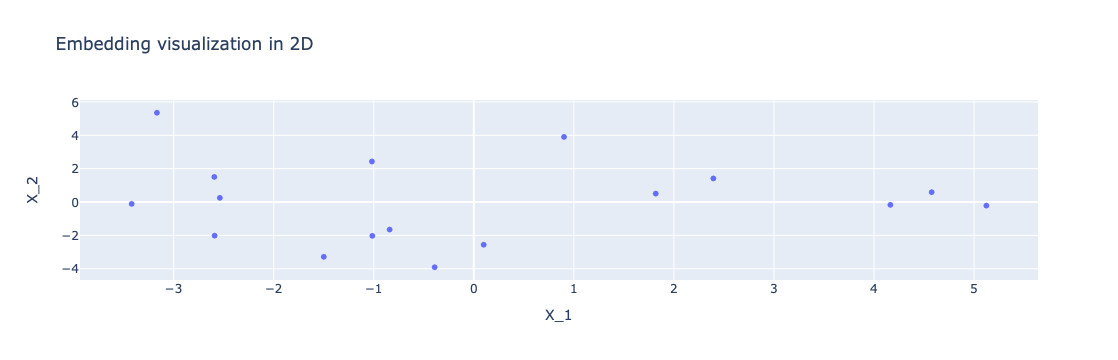

In [49]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl
import pandas as pd

plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

In [50]:
import plotly.express as px

def plot_3D(x_values, y_values, z_values, labels, colors=None):
    # Create a DataFrame with the data
    df = pd.DataFrame({'X': x_values, 'Y': y_values, 'Z': z_values, 'Label': labels})
    
    # Assign colors to each unique label if colors are not provided
    if colors is None:
        unique_labels = df['Label'].unique()
        color_map = {label: f'rgb({r}, {g}, {b})' for label, (r, g, b) in zip(unique_labels, px.colors.qualitative.Plotly)}
        df['Color'] = df['Label'].map(color_map)
    else:
        df['Color'] = colors
    
    # Create the 3D scatter plot using Plotly Express
    fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Color', hover_name='Label', title='Embedding visualization in 3D')
    
    # Update the layout
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial')
    )
    
    # Show the plot
    fig.show()

In [52]:
from sklearn.manifold import TSNE

# Assuming you have your embeddings stored in a variable called 'embeddings'
tsne = TSNE(n_components=3, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_array)

x_values = embeddings_tsne[:, 0]
y_values = embeddings_tsne[:, 1]
z_values = embeddings_tsne[:, 2]

plot_3D(x_values, y_values, z_values, labels)

ValueError: perplexity must be less than n_samples